In [14]:
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.applications import densenet
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping

from sklearn.metrics import confusion_matrix,classification_report
import numpy as np




In [15]:
base_model=densenet.DenseNet169(weights='imagenet',include_top=False)

x=base_model.output 
x=GlobalAveragePooling2D()(x)
x=Dropout(0.5)(x)

preds=Dense(2, activation='sigmoid')(x)
model=Model(inputs=base_model.input, outputs=preds)

In [16]:
BATCH_SIZE=16

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                 zoom_range=0.2,
                                 brightness_range=[0.2,1.0],
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [18]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/project-COVID_CT/output/train',
                                                  target_size=(480,480),
                                                  color_mode='rgb',
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  shuffle=True)


Found 524 images belonging to 2 classes.


In [19]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/project-COVID_CT/output/val',
                                                  target_size=(480,480),
                                                  color_mode='rgb',
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  shuffle=True)


Found 112 images belonging to 2 classes.


In [20]:
test_generator=test_datagen.flow_from_directory('/content/drive/MyDrive/project-COVID_CT/output/test',
                                                 shuffle=False)

Found 114 images belonging to 2 classes.


In [22]:
es=EarlyStopping(monitor='val_loss', patience=3)
mc=ModelCheckpoint('/content/drive/MyDrive/project-COVID_CT/dest_model.h5',
                   save_best_only=True)

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.samples//BATCH_SIZE,
                  validation_data=val_generator,
                  validation_steps=val_generator.samples//BATCH_SIZE,
                  epochs=50,
                  callbacks=[es,mc])

Epoch 1/50
32/32 [==============================] - 44s 1s/step - loss: 0.0758 - accuracy: 0.9902 - val_loss: 0.4094 - val_accuracy: 0.8304
Epoch 2/50
32/32 [==============================] - 43s 1s/step - loss: 0.0650 - accuracy: 0.9843 - val_loss: 0.3945 - val_accuracy: 0.8571
Epoch 3/50
32/32 [==============================] - 43s 1s/step - loss: 0.1315 - accuracy: 0.9547 - val_loss: 0.4592 - val_accuracy: 0.8214
Epoch 4/50
32/32 [==============================] - 43s 1s/step - loss: 0.0928 - accuracy: 0.9705 - val_loss: 0.2164 - val_accuracy: 0.9018
Epoch 5/50
32/32 [==============================] - 43s 1s/step - loss: 0.0769 - accuracy: 0.9744 - val_loss: 0.2505 - val_accuracy: 0.9375
Epoch 6/50
32/32 [==============================] - 42s 1s/step - loss: 0.0556 - accuracy: 0.9843 - val_loss: 0.1316 - val_accuracy: 0.9464
Epoch 7/50
32/32 [==============================] - 43s 1s/step - loss: 0.0621 - accuracy: 0.9783 - val_loss: 0.7035 - val_accuracy: 0.7679
Epoch 8/50
32/32 [==

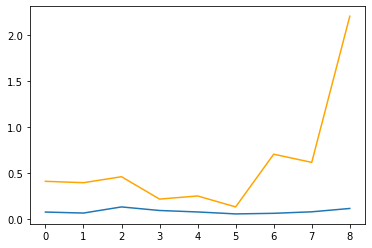

In [27]:
plt.plot(history.epoch,history.history['loss'])
plt.plot(history.epoch,history.history['val_loss'],color='orange')

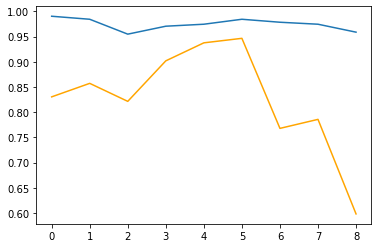

In [28]:
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'],color='orange')

In [30]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [32]:
predictions=model.predict(test_generator)
predictions

array([[2.2706372e-08, 9.9999988e-01],
       [7.7818246e-10, 1.0000000e+00],
       [1.3005095e-08, 9.9999976e-01],
       [4.9690623e-04, 9.9903131e-01],
       [6.1918634e-12, 1.0000000e+00],
       [2.4679937e-05, 9.9986005e-01],
       [3.1710548e-05, 9.9997056e-01],
       [1.1374177e-09, 1.0000000e+00],
       [2.4220171e-07, 9.9999928e-01],
       [1.0908890e-10, 1.0000000e+00],
       [2.1064245e-10, 1.0000000e+00],
       [5.9139832e-10, 1.0000000e+00],
       [8.0123681e-07, 9.9999774e-01],
       [2.3832620e-04, 9.9964595e-01],
       [7.5155830e-01, 9.2288814e-02],
       [9.9707535e-03, 9.8527223e-01],
       [1.0541559e-07, 9.9999952e-01],
       [9.1195740e-02, 7.9423392e-01],
       [4.5929014e-04, 9.9895275e-01],
       [2.5140163e-05, 9.9979323e-01],
       [9.7584016e-05, 9.9993443e-01],
       [1.0844518e-05, 9.9995077e-01],
       [1.4488043e-03, 9.9605775e-01],
       [5.5738456e-06, 9.9998438e-01],
       [3.1108543e-11, 1.0000000e+00],
       [2.3877553e-07, 9.

In [33]:
single_pred=np.argmax(predictions, axis=1)
single_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [35]:
confusion_matrix(test_generator.classes,single_pred)

array([[ 3, 50],
       [ 0, 61]])

In [38]:
print(classification_report(test_generator.classes,single_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        53
           1       0.55      1.00      0.71        61

    accuracy                           0.56       114
   macro avg       0.77      0.53      0.41       114
weighted avg       0.76      0.56      0.43       114



In [43]:
from keras.models import load_model
saved_model=load_model("/content/drive/MyDrive/project-COVID_CT/dest_model.h5")
saved_model

In [44]:
saved_model_predictions=saved_model.predict(test_generator)

saved_single_pred=np.argmax(saved_model_predictions,axis=1)
saved_single_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])